# Feedforward neural network

In [ ]:
!pip install keras

#### Import the packages

In [3]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

#### Load the training and testing data (MNIST

In [8]:
(x_train, y_train),(x_test, 
                    y_test) = mnist.load_data()

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
import matplotlib.pyplot as plt

In [14]:
x = np.zeros(100).reshape(10,10)

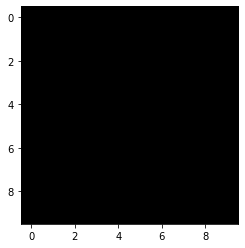

In [16]:
plt.imshow(x, cmap='gray')

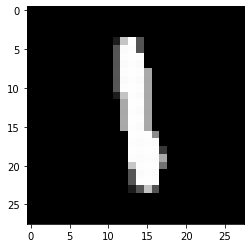

In [23]:
plt.imshow(x_train[200], cmap='gray')

In [24]:
y_train[200]

1

Text(0.5, 1.0, '2')

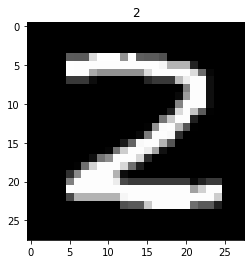

In [27]:
plt.imshow(x_train[220], cmap='gray')
plt.title(y_train[220])

Text(0.5, 1.0, '7')

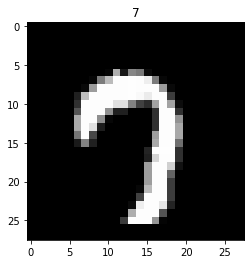

In [28]:
plt.imshow(x_test[220], cmap='gray')
plt.title(y_test[220])

In [29]:
x = np.array([[2,3,5],[8,9,0]])

In [30]:
x

array([[2, 3, 5],
       [8, 9, 0]])

In [31]:
x.shape

(2, 3)

In [34]:
x = x.flatten()
x

array([2, 3, 5, 8, 9, 0])

In [35]:
x.shape

(6,)

In [36]:
img = x_train[3]

In [37]:
img.shape

(28, 28)

In [38]:
img = img.flatten()
img.shape

(784,)

In [39]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [40]:
x_train.shape

(60000, 784)

In [41]:
x = np.array([8,6,5,7,0,3,4,2])

In [42]:
x/8

array([1.   , 0.75 , 0.625, 0.875, 0.   , 0.375, 0.5  , 0.25 ])

In [43]:
x_train = x_train / 255

In [44]:
x_test = x_test / 255

In [46]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [47]:
import seaborn as sns

<AxesSubplot:ylabel='count'>

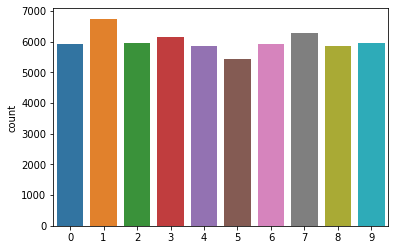

In [48]:
sns.countplot(x = y_train)

In [49]:
from collections import Counter
Counter(y_train)

Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

In [50]:
from keras.utils import to_categorical

In [51]:
x = [0,2,2,1,0,1,2]

In [52]:
to_categorical(x)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [53]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [55]:
y_train.shape

(60000, 10)

In [56]:
y_test.shape

(10000, 10)

#### Define the network architecture

In [71]:
# Object of neural network
model = Sequential()

# Input layer
model.add(Dense(784, input_shape=(784,),
         activation='relu'))

# Hidden Layer-1
model.add(Dense(256, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

In [72]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 784)               615440    
                                                                 
 dense_19 (Dense)            (None, 256)               200960    
                                                                 
 dense_20 (Dense)            (None, 10)                2570      
                                                                 
Total params: 818,970
Trainable params: 818,970
Non-trainable params: 0
_________________________________________________________________


#### Compile the model

In [75]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

#### Train the model

In [76]:
history = model.fit(x_train, y_train, epochs=10,
         batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 52s 8ms/step - loss: 0.1295 - accuracy: 0.9618
Epoch 2/10
6000/6000 [==============================] - 51s 8ms/step - loss: 0.0820 - accuracy: 0.9752
Epoch 3/10
6000/6000 [==============================] - 51s 8ms/step - loss: 0.0627 - accuracy: 0.9810
Epoch 4/10
6000/6000 [==============================] - 51s 8ms/step - loss: 0.0537 - accuracy: 0.9847
Epoch 5/10
6000/6000 [==============================] - 51s 9ms/step - loss: 0.0441 - accuracy: 0.9872
Epoch 6/10
6000/6000 [==============================] - 51s 9ms/step - loss: 0.0414 - accuracy: 0.9883
Epoch 7/10
6000/6000 [==============================] - 52s 9ms/step - loss: 0.0373 - accuracy: 0.9901
Epoch 8/10
6000/6000 [==============================] - 51s 9ms/step - loss: 0.0349 - accuracy: 0.9908
Epoch 9/10
6000/6000 [==============================] - 51s 9ms/step - loss: 0.0340 - accuracy: 0.9920
Epoch 10/10
6000/6000 [==============================] - 52s 9ms/step - l

In [80]:
history.history

{'loss': [0.129514679312706,
  0.08201663196086884,
  0.06271802634000778,
  0.05371781066060066,
  0.04413919150829315,
  0.041412871330976486,
  0.03728529065847397,
  0.0348687469959259,
  0.03398720920085907,
  0.030815543606877327],
 'accuracy': [0.9618333578109741,
  0.9751666784286499,
  0.9810166954994202,
  0.9846500158309937,
  0.9872000217437744,
  0.988349974155426,
  0.9901333451271057,
  0.9908499717712402,
  0.9920166730880737,
  0.9927666783332825]}

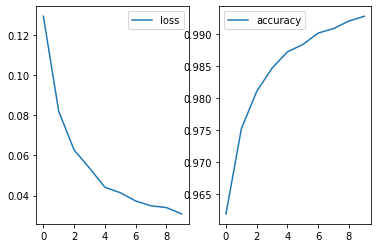

In [87]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 
         label='accuracy')
plt.legend()

In [86]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 22s 2ms/step - loss: 0.1254 - accuracy: 0.9771


[0.1253618448972702, 0.9771000146865845]